In [30]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np    # essential libraries

In [4]:
(X_train,y_train), (X_test, y_test) = datasets.cifar10.load_data()     # load cifar 10 dataset

In [8]:
X_train.shape       # checking the shape of X_train, 50 k training samples, each sample is 32X32(pixel image) X3 (RGB channels) 

(50000, 32, 32, 3)

In [9]:
X_test.shape                      # in X_test we have 10 K images

(10000, 32, 32, 3)

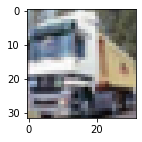

In [12]:
plt.figure(figsize = (15,2))      # Reducing the size of the image and printing  it using imshow
plt.imshow(X_train[1])

In [13]:
y_train.shape          # Checking the shape of y_train, - 50 K samples

(50000, 1)

In [14]:
y_train[:5]           # first 5 samples of y_train are numbers - 6 is frog, 9 is truck, 4-deer, all these are in a 2D array, 
                      # Lets reshape this 2D array to 1D to convieninetly use y_train 

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [15]:
                                # reshape y_train using reshape(), numpy
y_train = y_train.reshape(-1,)  # "-1"- keep 50 K as it is, then flatten the array [6] as 6 now leave a ",blank" for this  
y_train[:5]                     # now we got a 1D array instead of 2D 

array([6, 9, 9, 4, 1], dtype=uint8)

In [16]:
# airoplane label 0, automobile 1, bird 2 and so-on, defined this way in y_train

classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [18]:
y_train[0]       # y_train has the information about what the corresponding X_train images are, we can use this for training 
                 # here 6 means 0th sample is a frog (inbuilt, defined in that way) 

6

In [19]:
#Defining a function named plot_sample, takes X,y,index and prints that image, and label it (about what it is) using y_train

def plot_sample(X, y, index):
    plt.figure(figsize = (15,2) ) 
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

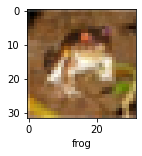

In [20]:
plot_sample(X_train, y_train, 0)         # cheking our above defined function 

In [22]:
# normalize the data by dividing with 255 ,each pixel value will be normalized into 0-1 range
X_train = X_train/255
X_test = X_test/255

In [24]:
# ANN model 
ann = models.Sequential([                         
      layers.Flatten(input_shape=(32,32,3)),     # Define the input shape and flatten in to 1D
      layers.Dense(3000, activation='relu'),     # 3D image data has a lot of features
      layers.Dense(1000, activation='relu'),     # more no. of neurons to capture more features min dense layer 
      layers.Dense(10, activation='sigmoid')     # last o/p layer 10 neurons for 10 categories
      ])

ann.compile(optimizer='adam',                         
            loss='sparse_categorical_crossentropy',  
            metrics=['accuracy'])

In [25]:
ann.fit(X_train, y_train, epochs=5)                # training 


Epoch 1/5
1563/1563 [==============================] - 118s 75ms/step - loss: 2.2310 - accuracy: 0.2753
Epoch 2/5
1563/1563 [==============================] - 122s 78ms/step - loss: 1.6843 - accuracy: 0.3964
Epoch 3/5
1563/1563 [==============================] - 130s 83ms/step - loss: 1.5864 - accuracy: 0.4297
Epoch 4/5
1563/1563 [==============================] - 114s 73ms/step - loss: 1.5318 - accuracy: 0.4491
Epoch 5/5
1563/1563 [==============================] - 116s 75ms/step - loss: 1.4936 - accuracy: 0.4663


In [26]:
ann.evaluate(X_test, y_test)          # evaluating accuracy on testsamples, poor accuracy 

313/313 [==============================] - 3s 9ms/step - loss: 1.5274 - accuracy: 0.4527


[1.5273629426956177, 0.4526999890804291]

In [28]:
ann.summary()   # no of parameters is soo high in ANN, hence more complex and a slower training 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 3000)              9219000   
_________________________________________________________________
dense_4 (Dense)              (None, 1000)              3001000   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                10010     
Total params: 12,230,010
Trainable params: 12,230,010
Non-trainable params: 0
_________________________________________________________________


In [31]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))       

Classification Report: 
               precision    recall  f1-score   support

           0       0.55      0.46      0.50      1000
           1       0.63      0.48      0.55      1000
           2       0.42      0.15      0.22      1000
           3       0.32      0.38      0.35      1000
           4       0.35      0.51      0.41      1000
           5       0.39      0.29      0.33      1000
           6       0.41      0.63      0.50      1000
           7       0.62      0.39      0.48      1000
           8       0.47      0.73      0.57      1000
           9       0.54      0.50      0.52      1000

    accuracy                           0.45     10000
   macro avg       0.47      0.45      0.44     10000
weighted avg       0.47      0.45      0.44     10000



In [32]:
# CNN model 
cnn = models.Sequential([
  
    # cnn
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),    
    
    
    #dense
    layers.Flatten(),    
    layers.Dense(64, activation='relu'),     
    layers.Dense(10, activation='softmax')    
    
])

#  2 convolution layers, 2 max poling layers 
#  conv-pooling-activation-conv-pooling-activation-dense network-output layer    

In [33]:
cnn.compile(optimizer = 'adam',                          # compiling the model
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [34]:
cnn.fit(X_train, y_train, epochs=20)                    # train the model using the data 

Epoch 1/20
1563/1563 [==============================] - 32s 20ms/step - loss: 1.6905 - accuracy: 0.3815
Epoch 2/20
1563/1563 [==============================] - 30s 19ms/step - loss: 1.1361 - accuracy: 0.6007
Epoch 3/20
1563/1563 [==============================] - 31s 20ms/step - loss: 0.9905 - accuracy: 0.6558
Epoch 4/20
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8934 - accuracy: 0.6917
Epoch 5/20
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8151 - accuracy: 0.7175
Epoch 6/20
1563/1563 [==============================] - 32s 21ms/step - loss: 0.7484 - accuracy: 0.7377
Epoch 7/20
1563/1563 [==============================] - 32s 20ms/step - loss: 0.7030 - accuracy: 0.7562
Epoch 8/20
1563/1563 [==============================] - 30s 19ms/step - loss: 0.6602 - accuracy: 0.7678
Epoch 9/20
1563/1563 [==============================] - 29s 19ms/step - loss: 0.6131 - accuracy: 0.7861
Epoch 10/20
1563/1563 [==============================] - 30s 19m

In [35]:
cnn.evaluate(X_test,y_test)               # evaluate the above model using test sample data

313/313 [==============================] - 2s 5ms/step - loss: 1.2938 - accuracy: 0.6791


[1.2937636375427246, 0.679099977016449]

In [36]:
y_test[:5]                               # Similar to y_train ,y_test is also in 2D

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [37]:
y_test = y_test.reshape(-1,)            # Reshaping it to 1D so that we can use y_test variable in plotting function
 y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

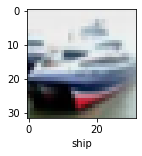

In [38]:
plot_sample(X_test, y_test, 1)

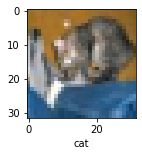

In [39]:
plot_sample(X_test, y_test, 0)

In [40]:
y_pred = cnn.predict(X_test)           # predict the values and store in an array
y_pred[:5]

array([[4.41712388e-07, 1.92156691e-07, 2.36790856e-05, 9.97344315e-01,
        3.70219873e-08, 2.60594441e-03, 1.43627485e-05, 1.35172595e-10,
        1.09635121e-05, 2.11559907e-07],
       [2.38699578e-02, 8.77629399e-01, 1.11689875e-08, 2.26918984e-10,
        1.33433181e-13, 3.68789255e-13, 5.38155166e-14, 2.87107794e-12,
        9.84979942e-02, 2.75592515e-06],
       [2.83664912e-01, 2.14317277e-01, 3.84848448e-04, 9.23778571e-04,
        1.28520740e-04, 5.02635612e-06, 7.22473175e-08, 1.22831678e-02,
        4.79053557e-01, 9.23890248e-03],
       [9.37574148e-01, 2.12705745e-05, 1.66812436e-06, 3.67018856e-07,
        6.23899736e-02, 6.66893984e-10, 1.75688596e-11, 8.77269229e-11,
        1.24983280e-05, 1.06843217e-07],
       [1.30748665e-08, 1.17007530e-05, 6.82970703e-01, 2.44765133e-02,
        2.60668606e-01, 1.11139918e-04, 3.17611806e-02, 1.67475145e-09,
        3.66970587e-09, 6.40236024e-08]], dtype=float32)

In [42]:
y_classes = [np.argmax(element) for element in y_pred]      # apply argmax on the predictions to get the same values as y_train
y_classes[:5]

[3, 1, 8, 0, 2]

In [33]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

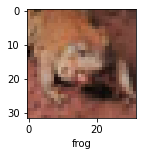

In [46]:
plot_sample(X_test, y_test, 5)

In [47]:
classes[y_classes[5]]

'frog'

In [60]:
print("Classification_report :\n", classification_report(y_test, y_classes))

Classification_report :
               precision    recall  f1-score   support

           0       0.68      0.73      0.71      1000
           1       0.82      0.80      0.81      1000
           2       0.53      0.62      0.57      1000
           3       0.48      0.49      0.49      1000
           4       0.65      0.57      0.61      1000
           5       0.58      0.61      0.59      1000
           6       0.79      0.74      0.76      1000
           7       0.72      0.72      0.72      1000
           8       0.79      0.75      0.77      1000
           9       0.80      0.74      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



In [58]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                147520    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

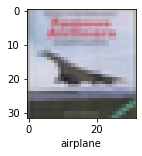

In [49]:
plot_sample(X_test, y_test, 3)

In [50]:
classes[y_classes[3]]                 # prediction is correct here

'airplane'

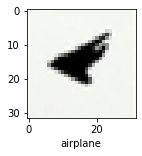

In [51]:
plot_sample(X_test, y_test, 21)

In [52]:
classes[y_classes[21]]                 # prediction is a mismatch. Some evn us cant tell its an airplane/bird

'bird'

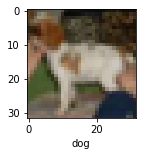

In [55]:
plot_sample(X_test, y_test, 12)

In [56]:
classes[y_classes[12]]                # correct prediction

'dog'

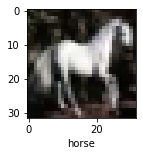

In [57]:
plot_sample(X_test, y_test, 13)

In [47]:
classes[y_classes[13]]                # correct prediction

'horse'

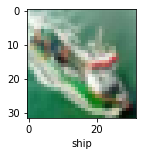

In [48]:
plot_sample(X_test, y_test, 15)

In [49]:
classes[y_classes[15]]                # a mismatch

'frog'